In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn.metrics import mutual_info_score

In [72]:
semAtaque = pd.read_csv('livreAtaque.csv')
ataque = pd.read_csv('sofreuAtaque.csv')


dfJogos = pd.read_csv('Games.csv')
dfJogos = dfJogos[dfJogos['totalComments'] > 0]


dfUsuarios = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')
dfUsuarios = dfUsuarios[dfUsuarios['Toxicity'] > 0]

# Exibir a contagem de valores nulos por coluna
dfJogos.fillna(0, inplace=True)

C:\Users\cotoq\AppData\Local\Temp\ipykernel_7040\163056648.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsuarios = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')


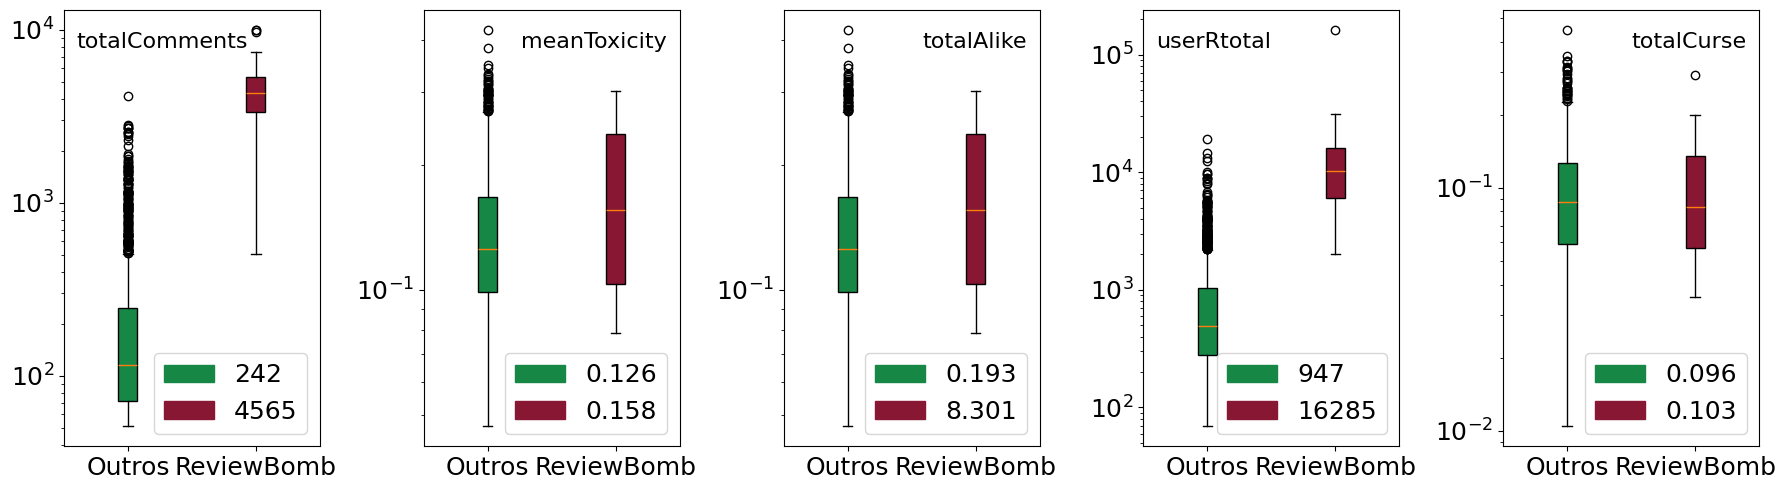

In [73]:
variables = ['totalComments', 'meanToxicity', 'totalAlike', 'userRtotal', 'totalCurse']

# Creating the boxplot for each variable
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 5), facecolor='white')

# Defining colors
colors = ['#178746', '#871733']

valoresAtaque = ['4565', '0.158', '8.301', '16285', '0.103']
valoresSemAtaque = ['242', '0.126', '0.193', '947', '0.096']

for i, var in enumerate(variables):
    # Extracting data for each variable
    if var != 'totalAlike':
        temp1 = semAtaque[semAtaque[var] > 0]
        temp2 = ataque[ataque[var] > 0]
        data_sem_ataque = temp1[var]
        data_ataque = temp2[var]
    
    # Adding data to the boxplot
    boxplot = axs[i].boxplot([data_sem_ataque, data_ataque], labels=['Outros', 'ReviewBomb'], patch_artist=True)

    # Adding logarithmic scale to the Y-axis
    axs[i].set_yscale('log')
    
    # Setting the colors
    for box, color in zip(boxplot['boxes'], colors):
        box.set_facecolor(color)

    legend_patches = [
            mpatches.Patch(color=colors[0], label=valoresSemAtaque[i]),
            mpatches.Patch(color=colors[1], label=valoresAtaque[i])
    ]
    legend = axs[i].legend(handles=legend_patches, fontsize=18, loc='lower right')  # Increase legend font size
    legend.get_frame().set_facecolor('white')  # Set legend background to white
    
    # Adding extra legend in the top right corner
    if(i == 0 or  i == 3):
        axs[i].text(0.05, 0.95, var, transform=axs[i].transAxes, fontsize=16, ha='left', va='top')
    else:
        axs[i].text(0.95, 0.95, var, transform=axs[i].transAxes, fontsize=16, ha='right', va='top')
    
    axs[i].grid(False)
    #axs[i].set_facecolor('white')  # Set axes background to white
    axs[i].tick_params(axis='both', which='major', labelsize=18)  # Increase axis tick label font size

plt.tight_layout()
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\Boxplot.pdf', bbox_inches='tight')

# Display the plot
plt.show()

In [74]:
dfJogos['platform'] = dfJogos['plataforms'].str.split(', ')
dfJogos = dfJogos[dfJogos['meanToxicity'] > 0]
# Explode the DataFrame to separate rows for each platform
dfPlatform = dfJogos.explode('platform')
dfPlatform['platform'] = dfPlatform['platform'].str.replace(r"[\[\]']", "", regex=True)
# Get unique platforms
unique_platforms = dfPlatform['platform'].unique()
print(unique_platforms)

['PlayStation 4' 'Nintendo Switch' 'PC' 'Xbox Series X' 'PlayStation 3'
 'PlayStation Vita' 'Wii U' 'Xbox One' 'Xbox 360' 'PlayStation 2'
 'Game Boy Advance' 'GameCube' 'Xbox' 'DS' 'iOS (iPhone/iPad)' 'PSP'
 'PlayStation' 'PlayStation 5' '3DS' 'Wii' 'Nintendo 64' 'Dreamcast' nan]


In [75]:
platform_mapping = {
    'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation',
    'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation',
    'PlayStation Vita': 'PlayStation',
    'PlayStation': 'PlayStation',
    'PlayStation 5': 'PlayStation',
    
    'Xbox Series X': 'Xbox',
    'Xbox One': 'Xbox',
    'Xbox 360': 'Xbox',
    'Xbox': 'Xbox',

    'iOS (iPhone/iPad)': 'Mobile',
    'PC': 'PC',

    'GameCube': 'Nintendo',
    'Wii U': 'Nintendo',
    'Game Boy Advance': 'Nintendo',
    'DS': 'Nintendo',
    'Nintendo Switch': 'Nintendo',
    '3DS': 'Nintendo',
    'Wii': 'Nintendo',
    'Nintendo 64': 'Nintendo',
    
    'Dreamcast': 'Sega'
}
dfPlatform['platform'] = dfPlatform['platform'].replace(platform_mapping)

In [76]:
dfPlatform = dfPlatform[~dfPlatform['platform'].isin(['Dreamcast', 'iOS (iPhone/iPad)', 'Sega', 'Mobile'])]

In [77]:
print(dfPlatform['platform'].value_counts())

platform
PlayStation    9506
PC             7990
Xbox           6329
Nintendo       6226
Name: count, dtype: int64


In [78]:
color_nintendo = '#fe0016'
color_playstation = '#253f81'
color_xbox = '#107C10'
color_pc = '#404040'

def calculaCDF(df, coluna, titulo='CDF of Mean Toxicity for Each Platform'):
    plt.figure(figsize=(12, 8))
    unique_items = df[coluna].unique()
    
    for unique in unique_items:
        # Select rows for the current platform
        platform_data = df[df[coluna] == unique]
        # Calculate CDF
        x = np.sort(platform_data['meanToxicity'])
        y = np.arange(1, len(x) + 1) / len(x)
        
        # Determine color based on platform
        if unique == 'Nintendo':
            color = color_nintendo
        elif unique == 'Playstation':
            color = color_playstation
        elif unique == 'Xbox':
            color = color_xbox
        elif unique == 'PC':
            color = color_pc
        else:
            color = 'blue'  # Default color if platform not specified
        
        # Plot CDF with determined color
        plt.plot(x, y, label=unique, color=color)
    
    plt.xlabel('Toxicidade Média', fontsize=30)
    plt.ylabel('Probabilidade Cumulativa', fontsize=30)
    legend = plt.legend(fontsize=30)
    legend.get_frame().set_facecolor('white')  # Set legend box color to white
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.grid(True, linewidth=1.3, color='lightgray')  # Gray grid lines
    plt.gca().set_facecolor('white')
    plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\cdfPlataforma.pdf', bbox_inches='tight')
    plt.show()

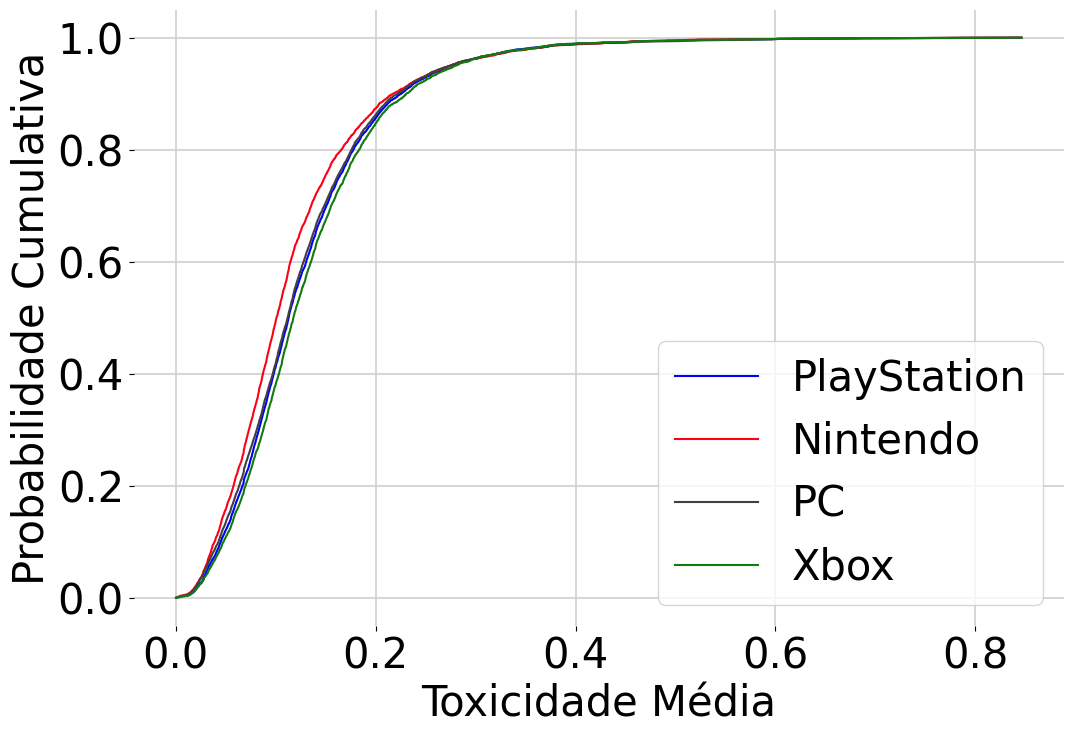

In [79]:
dfPlatform = dfPlatform.dropna()
calculaCDF(dfPlatform, 'platform')

In [80]:
print(dfJogos['Genre'].unique())

['["Horizontal Shoot-\'Em-Up"]' "['3D Platformer']" "['Metroidvania']"
 "['Defense']" "['Team Sports']" "['2D Platformer']" "['Action RPG']"
 "['Auto Racing']" "['Light Gun']" "['Survival']" "['Tycoon']"
 "['Action Puzzle']" "['Action Adventure']" "['Aircraft Sim']"
 "['Trivia']" "['Adventure']" "['Puzzle']" "['JRPG']" "['2D Fighting']"
 "['Turn-Based Tactics']" "['Point-and-Click']" "['Western RPG']"
 "['Management']" "['Third-Person Adventure']" "['Rhythm']"
 "['Visual Novel']" "['MMORPG']" "['Real-Time Strategy']"
 "['Virtual Pet']" "['Open-World Action']" "['Board']"
 '["Top-Down Shoot-\'Em-Up"]' "['Party']" "['FPS']" "['Basketball Sim']"
 "['Compilation']" "['Aircraft Combat Sim']" "['4X Strategy']"
 "['Auto Racing Sim']" "['Virtual Life']" "['Space Combat Sim']"
 "['Sandbox']" "['Tactical FPS']" "['Strategy']" "['Arcade']"
 "['Marine Combat Sim']" "['First-Person Adventure']" "['Golf']" "['RPG']"
 "['Application']" "['Train Sim']" "['Cricket']" '["2D Beat-\'Em-Up"]'
 "['Third Per

In [81]:
genre_mapping = {
    'Ação': ['Action RPG', 'Action Adventure', 'Action', 'Linear Action Adventure', 'Roguelike', "2D Beat-'Em-Up",'3D Fighting', '2D Fighting', "3D Beat-'Em-Up"],
    'Aventura': ["Adventure", 'Adventure', 'Point-and-Click', 'Third-Person Adventure',  'Text Adventure', 'Metroidvania', '3D Platformer', 'Plataform', '2D Platformer'],
    'Tiro': ['Horizontal Shoot-Em-Up', 'First-Person Adventure', "Horizontal Shoot-\'Em-Up", 'Top-Down Shoot-Em-Up', 'FPS (First-Person Shooter)', 'Tactical FPS', 'Third Person Shooter', 'Tactical Third Person Shooter', 'Rail Shooter', 'Light Gun', "Vertical Shoot-'Em-Up", "Top-Down Shoot-'Em-Up", 'FPS'],
    'Esportes': ['Team Sports', 'Basketball Sim', 'Football Sim', 'Biking', 'Combat Sport', 'Soccer Management', 'Golf', 'Cricket', 'Tennis', 'Soccer', 'Hockey', 'Skating', 'Basketball', 'Football', 'Hockey Sim', 'Bowling', 'Surfing', 'Baseball', 'Rugby', 'Volleyball', 'Soccer Sim', 'Golf Sim', 'Skiing', 'Soccer Sim', 'Hockey Sim', 'Billiards', 'Future Sport', 'Individual Sports', 'Sports', 'Exercise'],
    'Corrida': ['Auto Racing', 'Auto Racing Sim', 'Arcade Racing', 'Future Racing', 'Racing', 'Racing Sim', 'Horse Racing', 'Space Combat Sim', 'Baseball Sim'],
    'Simulação': ['Management', 'Virtual Pet', 'Open-World Action', 'Space Sim', 'Marine Sim', 'Train Sim', 'Aircraft Sim', 'Vehicle Sim', 'Marine Combat Sim', 'Aircraft Combat Sim', 'Vehicle Combat Sim'],
    'Estratégia': ['Real-Time Strategy', 'Turn-Based Tactics', 'Turn-Based Strategy', 'Command RTS', 'Real-Time Tactics', '4X Strategy','Strategy', 'Tycoon'],
    'Puzzle': ['Puzzle', 'Stacking Puzzle', 'Logic Puzzle', 'Matching Puzzle', 'Pinball', 'Trivia', 'Action Puzzle'],
    'RPG': ['JRPG (Japanese Role-Playing Game)', 'Western RPG', 'RPG', 'Trainer RPG', 'MMORPG', 'Virtual Career', 'JRPG'],
    'Outros': ['Survival', 'Party', 'Arcade', 'Dancing', 'Fishing', 'Exercise' 'Billiards', 'Wrestling', 'Athletics', 'Visual Novel', 'Rhythm', 'Card Battle', 'Artillery', 'Hunting', 'Gambling', 'Hidden Object','Edutainment', 'Simulation', 'Board', 'Defense', 'Virtual Life', 'Compilation', 'Sandbox', 'Application', 'Miscellaneous', 'MOBA'],
}

# Aplicar o mapeamento dos gêneros de jogos para categorias mais amplas
def map_genre(genres):
    for genre in eval(genres):
        for category, subgenres in genre_mapping.items():
            if genre in subgenres:
                return category
    return genres
dfGenre = dfJogos
dfGenre['Genre'] = dfJogos['Genre'].apply(map_genre)

In [82]:
print(dfGenre['Genre'].value_counts())

Genre
Ação          2360
Aventura      1821
Outros        1727
Tiro          1625
Estratégia    1274
RPG            955
Corrida        726
Simulação      667
Esportes       538
Puzzle         490
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


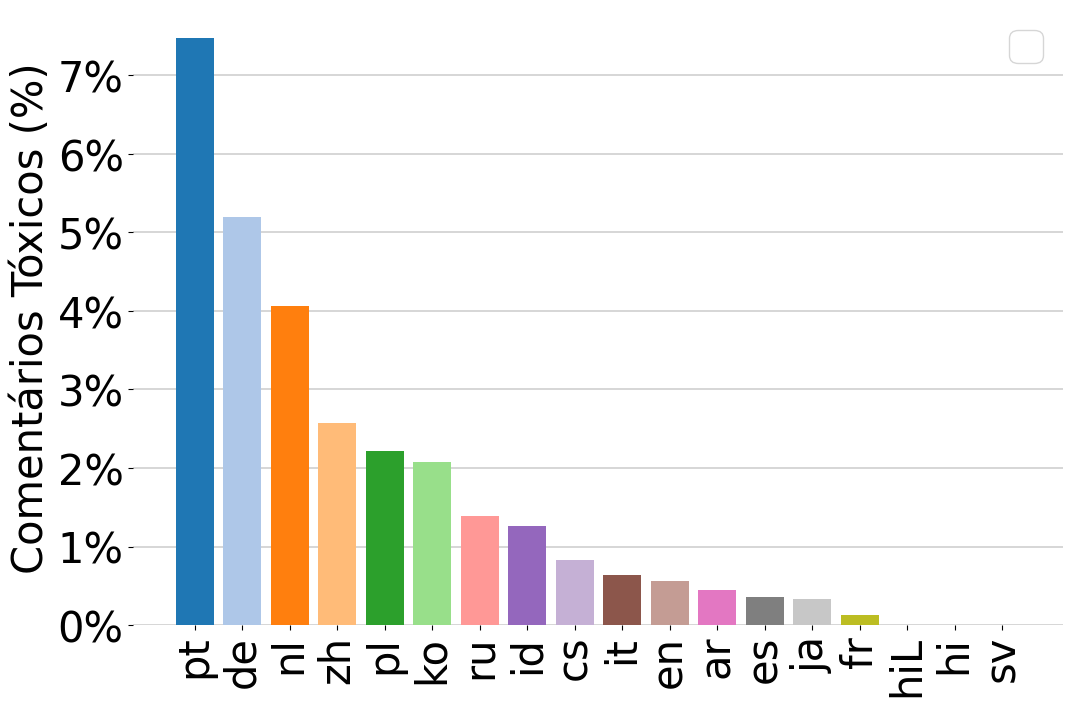

In [83]:
dfLanguage = dfUsuarios
dfLanguage['Toxicity'] = np.where(dfUsuarios['Toxicity'] > 0.75, 1, 0)
dfLanguage['Language'] = dfLanguage['Language'].replace('hi-Latn', 'hiL')
language_mean_toxicity = dfLanguage.groupby('Language')['Toxicity'].mean().sort_values(ascending=False) * 100

# Plotando o histograma
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(language_mean_toxicity)))
bars = plt.bar(language_mean_toxicity.index, language_mean_toxicity, color=colors)

# Adicionando título e rótulos
plt.ylabel('Comentários Tóxicos (%)', fontsize=30)

# Formatando o eixo Y para mostrar porcentagem com três casas decimais
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Adicionando uma legenda (se necessário)
# for bar, color, label in zip(bars, colors, language_mean_toxicity.index):
#     bar.set_label(label)

plt.legend()
plt.xticks(rotation=90)
plt.legend(fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, axis='y', linewidth=1.3, color='lightgray')  # Gray grid lines
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
# Salvando o gráfico sem borda
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\ToxicidadePlinguagem.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


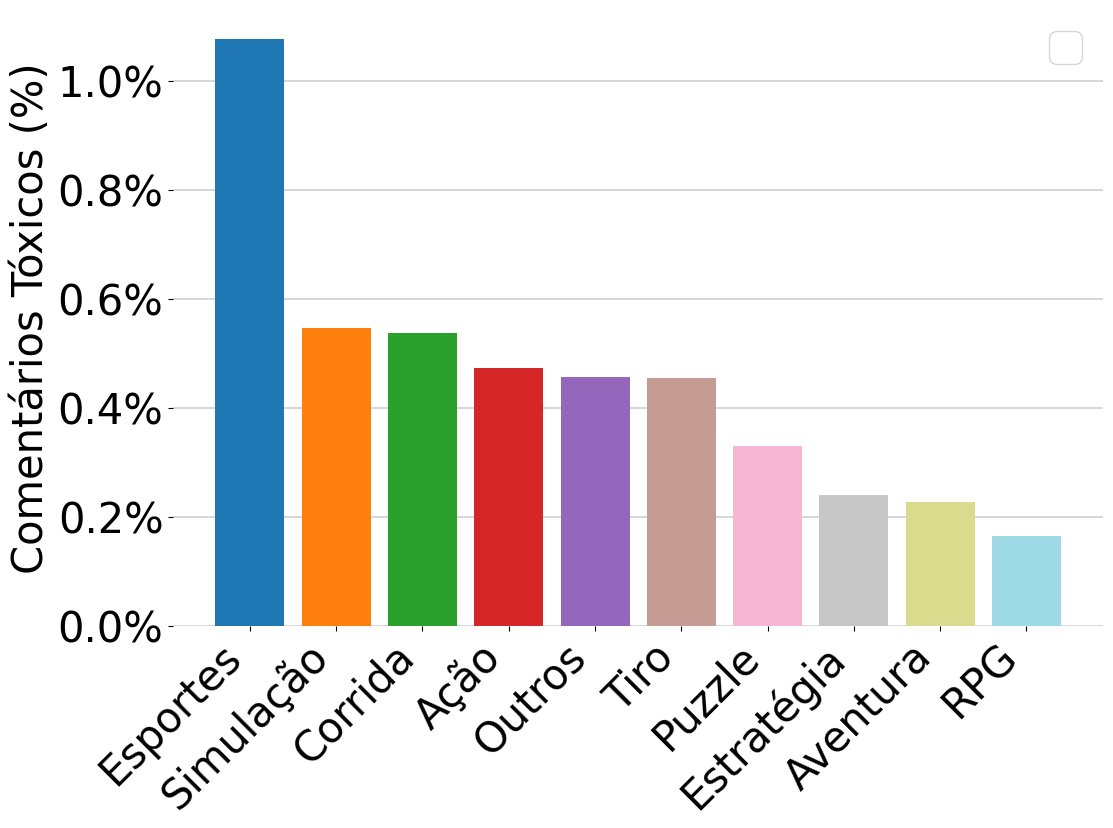

In [84]:
genre_mean_toxicity = dfGenre.groupby('Genre')['comentariosToxicos/Total'].mean().sort_values(ascending=False)

# Convertendo os valores para porcentagem
genre_mean_toxicity_percentage = genre_mean_toxicity * 100

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(genre_mean_toxicity_percentage)))
bars = plt.bar(genre_mean_toxicity_percentage.index, genre_mean_toxicity_percentage, color=colors)

# Adicionando título e rótulos
plt.ylabel('Comentários Tóxicos (%)', fontsize=30)

# Formatando o eixo Y para mostrar porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.legend(fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.grid(True, axis='y', linewidth=1.3, color='lightgray')  # Gray grid lines
plt.gca().set_facecolor('white')
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\ToxicidadePgenero.pdf', bbox_inches='tight')

plt.show()

In [85]:
dfPT = dfLanguage[dfLanguage['Language'] == 'pt']

print(len(dfPT))
print(len(dfPT[dfPT['Toxicity'] == 1]))

14960
1117


In [86]:
dfAll = pd.read_csv('Games.csv')

13422
12200


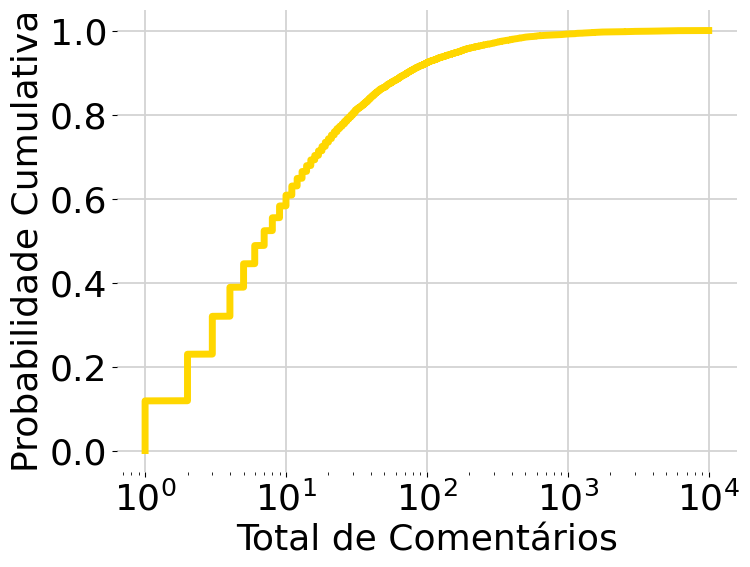

In [87]:
print(len(dfAll))
dfAll = dfAll[dfAll['totalComments'] > 0]
print(len(dfAll))
data = dfAll['totalComments']

# Sort the data
sorted_data = np.sort(data)

# Calculate the cumulative distribution
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, color='#FFD700', linewidth=5, linestyle='-')  # Metacritic green
plt.xscale('log')
plt.xlabel('Total de Comentários', fontsize=26)
plt.ylabel('Probabilidade Cumulativa', fontsize=26)
  # Change background to white

# Increase tick size
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True, linewidth=1.3, color='lightgray')  # Gray grid lines
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\comentariosPjogo.pdf', bbox_inches='tight')
plt.show()

In [88]:
dfTodosUsuarios = pd.read_csv('data-sets/game_reviews.csv')
print(dfTodosUsuarios['user'].nunique() )
#Amadores
dfAmadores = dfTodosUsuarios[dfTodosUsuarios['userType'] == 0]
print(dfAmadores['user'].nunique() )
#Profissionais
dfProfissionais = dfTodosUsuarios[dfTodosUsuarios['userType'] == 1]
print(dfProfissionais['user'].nunique())

print("----------")
print(len(dfTodosUsuarios))
print(len(dfAmadores))
print(len(dfProfissionais))


333624
333467
3097
----------
1017504
669277
348227


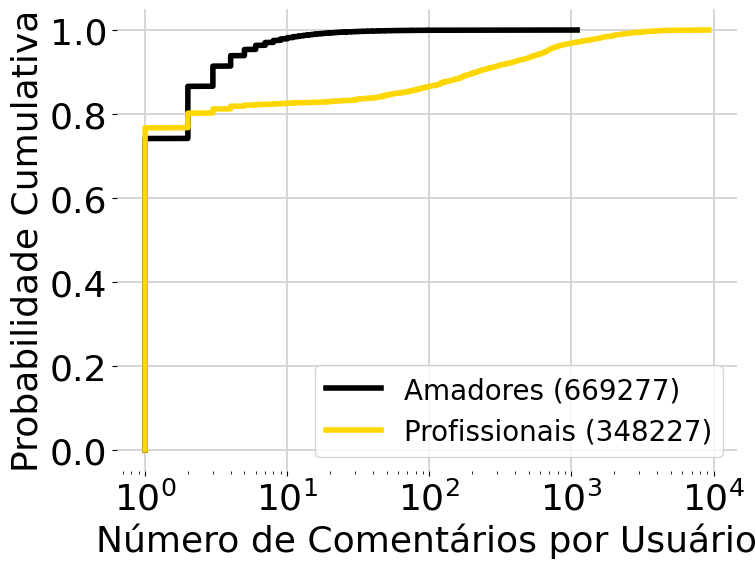

In [89]:
amadores_user_counts = dfAmadores['user'].value_counts()
profissionais_user_counts = dfProfissionais['user'].value_counts()

# Function to compute CDF
def compute_cdf(data):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

# Compute CDF for Amadores and Profissionais
amadores_sorted, amadores_cdf = compute_cdf(amadores_user_counts)
profissionais_sorted, profissionais_cdf = compute_cdf(profissionais_user_counts)

# Plot the CDFs
plt.figure(figsize=(8, 6))
plt.plot(amadores_sorted, amadores_cdf, label='Amadores (669277)', color='#000000', linewidth=4)  # Aumente o linewidth
plt.plot(profissionais_sorted, profissionais_cdf, label='Profissionais (348227)', color='#FFD700', linewidth=4)  

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel('Número de Comentários por Usuário', fontsize=26)
plt.ylabel('Probabilidade Cumulativa', fontsize=26)
plt.xscale('log')

# Set the legend with a white background
legend = plt.legend(loc='lower right', fontsize=20)
legend.get_frame().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.grid(True, linewidth=1.3, color='lightgray')  # Gray grid lines
plt.gca().set_facecolor('white')
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\comentariosPusuario.pdf', bbox_inches='tight')
plt.show()

In [90]:
dfInfo = pd.read_csv('Games.csv')
dfInfo = dfInfo.dropna()
columns_to_drop = ['plataforms', 'developer', 'publisher', 'Genre']
df = dfInfo.drop(columns=columns_to_drop)

def calculate_mci(df, target_col, feature_col):
    mutual_info = mutual_info_score(df[target_col], df[feature_col])
    return mutual_info

# Calcular o MCI para cada coluna de feature no dataframe
target_col = 'target'
feature_cols = dfInfo.columns[dfInfo.columns != target_col]

mci_scores = {}
for col in feature_cols:
    mci_score = calculate_mci(dfInfo, target_col, col)
    mci_scores[col] = mci_score

sorted_mci_scores = sorted(mci_scores.items(), key=lambda x: x[1], reverse=True)

# Exibir os resultados ordenados
print("Mutual Class Information (MCI) Scores - Ordenados do maior para o menor:")
for col, score in sorted_mci_scores:
    print(f"{col}: {score}")

Mutual Class Information (MCI) Scores - Ordenados do maior para o menor:
title: 0.018623487246707864
meanToxicity: 0.018623487246707864
noteVariance: 0.018623487246707593
comments/reviews: 0.01862348724670735
totalCurse: 0.018037604535621178
userRtotal: 0.017702782470686122
totalComments: 0.01748414683654511
totalKey: 0.016997937324823787
totalAlike: 0.016318224471873928
comentariosToxicos/Total: 0.016236111471579905
totalToxic: 0.015835451928203653
metricScore: 0.01528006223086093
plataforms: 0.010776400352827306
developer: 0.010022954579395196
metaRtotal: 0.008991323868288038
userscore: 0.006414335285068537
userRnegative: 0.006164707660798681
userRpositive: 0.005710393264635153
publisher: 0.00557799330878761
metaRpositive: 0.0046355347609145035
userRmixed: 0.004157923345144069
metaRmixed: 0.003934293984034318
metascore: 0.0034027780205640613
Genre: 0.0031813606196181552
metaRnegative: 0.0015748577901516755
rating: 0.0003363885664606427


C:\Users\cotoq\PycharmProjects\AllOfCritic\venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\cotoq\PycharmProjects\AllOfCritic\venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\cotoq\PycharmProjects\AllOfCritic\venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\cotoq\PycharmProjects\AllOfCritic\venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary value